In [22]:
#Data Preprocessing

#Dataset input dari kumpulan abstrak tugas akhir berbahasa indonesia
import pandas as pd
import string
import nltk
#nltk.download('punkt')

file_name = '33218302_abstrak.csv'
df = pd.read_csv(file_name, header = 0, delimiter = ';', encoding ='latin')
#print(df.head())

text_abstract = df['Abstract']
text_replace = text_abstract.str.replace(r'\d+(\.\d+)?','')   
text_replace = text_replace.str.translate(str.maketrans('','',string.punctuation))
text_replace = text_replace.str.replace(r'\s+',' ')
text_replace = text_replace.str.replace(r'^\s+|\s+?$',' ')
df_text = pd.DataFrame(text_replace)
pd.set_option('display.max_colwidth', -1)
print(df_text[:3])

In [23]:
#Pembuatan token dengan NLTK word_tokenize
from nltk.tokenize import word_tokenize

voc_text = []
voc_list = [] 
for message in text_replace:
    voc_text.append(message)
    for w in voc_text:
        text_voc = word_tokenize(w)
        voc_list.append(text_voc)
        
  
print(voc_list[:3])

[['Berkembangnya', 'teknologi', 'dan', 'kebutuhan', 'akan', 'informasi', 'menyebabkan', 'bertambah', 'kompleknya', 'informasi', 'yang', 'harus', 'dan', 'bisa', 'diolah', 'sehingga', 'kebutuhan', 'beberapa', 'jaringan', 'komputer', 'yang', 'lebih', 'dikenal', 'dengan', 'nama', 'internet', 'semakin', 'diperlukan', 'Berbagai', 'macam', 'tekhnologi', 'internet', 'bisa', 'digunakan', 'seperti', 'Word', 'Wide', 'Web', 'yang', 'mampu', 'mengolah', 'informasi', 'Proses', 'pengolahan', 'informasi', 'dengan', 'memanfaatkan', 'teknologi', 'web', 'menyebabkan', 'web', 'menjadi', 'media', 'informasi', 'yang', 'dinamisSTMIK', 'SAMARINDA', 'yang', 'merupakan', 'perguruan', 'tinggi', 'terkemuka', 'pada', 'saat', 'ini', 'telah', 'memanfaatkan', 'teknologi', 'informasi', 'untuk', 'menunjang', 'pengelolaan', 'berbagai', 'informasi', 'tentang', 'STMIK', 'SAMARINDA', 'dengan', 'membangun', 'sebuah', 'website', 'dalam', 'penelitian', 'yang', 'dilakukan', 'ini', 'website', 'yang', 'lama', 'banyak', 'kelemaha

In [24]:
word_freq = []
for w in voc_list:
    text_dist = nltk.FreqDist(w)
    word_freq.append([w,text_dist])

print(word_freq[:3])

[[['Berkembangnya', 'teknologi', 'dan', 'kebutuhan', 'akan', 'informasi', 'menyebabkan', 'bertambah', 'kompleknya', 'informasi', 'yang', 'harus', 'dan', 'bisa', 'diolah', 'sehingga', 'kebutuhan', 'beberapa', 'jaringan', 'komputer', 'yang', 'lebih', 'dikenal', 'dengan', 'nama', 'internet', 'semakin', 'diperlukan', 'Berbagai', 'macam', 'tekhnologi', 'internet', 'bisa', 'digunakan', 'seperti', 'Word', 'Wide', 'Web', 'yang', 'mampu', 'mengolah', 'informasi', 'Proses', 'pengolahan', 'informasi', 'dengan', 'memanfaatkan', 'teknologi', 'web', 'menyebabkan', 'web', 'menjadi', 'media', 'informasi', 'yang', 'dinamisSTMIK', 'SAMARINDA', 'yang', 'merupakan', 'perguruan', 'tinggi', 'terkemuka', 'pada', 'saat', 'ini', 'telah', 'memanfaatkan', 'teknologi', 'informasi', 'untuk', 'menunjang', 'pengelolaan', 'berbagai', 'informasi', 'tentang', 'STMIK', 'SAMARINDA', 'dengan', 'membangun', 'sebuah', 'website', 'dalam', 'penelitian', 'yang', 'dilakukan', 'ini', 'website', 'yang', 'lama', 'banyak', 'kelemah

In [25]:
#Melakukann tag dengan corpus tagger berbahasa indonesia 
from nltk.tag.sequential import ClassifierBasedPOSTagger
datas = open('Indonesian_Manually_Tagged_Corpus.tsv', 'r',encoding='latin').read()
datas = datas.split('\n\n')
train_sents = []
for data in datas:
    train_sents.append(list(tuple(i.split('\t')) for i in data.split('\n')))
    
tagger = ClassifierBasedPOSTagger(train=train_sents)
hasil = tagger.tag_sents(voc_list)
print(hasil[:2])

[[('Berkembangnya', 'PRP'), ('teknologi', 'NN'), ('dan', 'CC'), ('kebutuhan', 'NN'), ('akan', 'MD'), ('informasi', 'NN'), ('menyebabkan', 'VB'), ('bertambah', 'VB'), ('kompleknya', 'PRP'), ('informasi', 'NN'), ('yang', 'SC'), ('harus', 'MD'), ('dan', 'CC'), ('bisa', 'MD'), ('diolah', 'MD'), ('sehingga', 'SC'), ('kebutuhan', 'NN'), ('beberapa', 'CD'), ('jaringan', 'NN'), ('komputer', 'NN'), ('yang', 'SC'), ('lebih', 'RB'), ('dikenal', 'VB'), ('dengan', 'IN'), ('nama', 'NN'), ('internet', 'NN'), ('semakin', 'RB'), ('diperlukan', 'VB'), ('Berbagai', 'CD'), ('macam', 'NND'), ('tekhnologi', 'NN'), ('internet', 'NN'), ('bisa', 'MD'), ('digunakan', 'VB'), ('seperti', 'IN'), ('Word', 'FW'), ('Wide', 'FW'), ('Web', 'FW'), ('yang', 'SC'), ('mampu', 'JJ'), ('mengolah', 'MD'), ('informasi', 'NN'), ('Proses', 'NN'), ('pengolahan', 'NN'), ('informasi', 'NN'), ('dengan', 'IN'), ('memanfaatkan', 'VB'), ('teknologi', 'NN'), ('web', 'NNP'), ('menyebabkan', 'VB'), ('web', 'WH'), ('menjadi', 'VB'), ('medi

In [26]:
#menggunakan fasilitas numpy untuk transaksi dengan array
import numpy as np
 
sentences, sentence_tags =[], [] 
for tagged_sentence in hasil:
    sentence, tags = zip(*tagged_sentence)
    sentences.append(np.array(sentence))
    sentence_tags.append(np.array(tags))

#menampilkan word dengan tag-nya
print(sentences[:3])
print(sentence_tags[:3])

[array(['Berkembangnya', 'teknologi', 'dan', 'kebutuhan', 'akan',
       'informasi', 'menyebabkan', 'bertambah', 'kompleknya', 'informasi',
       'yang', 'harus', 'dan', 'bisa', 'diolah', 'sehingga', 'kebutuhan',
       'beberapa', 'jaringan', 'komputer', 'yang', 'lebih', 'dikenal',
       'dengan', 'nama', 'internet', 'semakin', 'diperlukan', 'Berbagai',
       'macam', 'tekhnologi', 'internet', 'bisa', 'digunakan', 'seperti',
       'Word', 'Wide', 'Web', 'yang', 'mampu', 'mengolah', 'informasi',
       'Proses', 'pengolahan', 'informasi', 'dengan', 'memanfaatkan',
       'teknologi', 'web', 'menyebabkan', 'web', 'menjadi', 'media',
       'informasi', 'yang', 'dinamisSTMIK', 'SAMARINDA', 'yang',
       'merupakan', 'perguruan', 'tinggi', 'terkemuka', 'pada', 'saat',
       'ini', 'telah', 'memanfaatkan', 'teknologi', 'informasi', 'untuk',
       'menunjang', 'pengelolaan', 'berbagai', 'informasi', 'tentang',
       'STMIK', 'SAMARINDA', 'dengan', 'membangun', 'sebuah', 'website',


In [27]:
#mempersiapkan data training dan data testing
from sklearn.model_selection import train_test_split
(train_sentences, 
 test_sentences, 
 train_tags, 
 test_tags) = train_test_split(sentences, sentence_tags, test_size=0.1)

print(train_sentences[:5])
print(test_sentences[:5])

[array(['Ilmu', 'Tajwid', 'merupakan', 'ilmu', 'yang', 'mempelajari',
       'kaidahkaidah', 'dalam', 'membaca', 'AlQuran', 'Hukum',
       'mempelajari', 'ilmu', 'tajwid', 'adalah', 'fardhu', 'kifayah',
       'sedangkan', 'menerapkannya', 'dalam', 'membaca', 'AlQuran',
       'adalah', 'fardhu', 'ain', 'Pada', 'jaman', 'dahulu', 'anakanak',
       'seusia', 'anak', 'SMP', 'sudah', 'mempelajari', 'ilmu', 'tajwid',
       'bahkan', 'anak', 'seusia', 'SD', 'bahkan', 'TKATPA', 'Akan',
       'tetapi', 'anakanak', 'pada', 'jaman', 'sekarang', 'lebih',
       'terpengaruh', 'oleh', 'teknologi', 'salah', 'satunya',
       'smartphone', 'sehingga', 'anakanak', 'terlena', 'dengan',
       'teknologi', 'tersebut', 'yanga', 'mana', 'mereka', 'lebih',
       'asik', 'dengan', 'bermain', 'game', 'sosial', 'media', 'dan',
       'sebagainya', 'Oleh', 'karena', 'itu', 'maka', 'dibuatlah',
       'aplikasi', 'pembelajaran', 'ilmu', 'tajwid', 'berbasis',
       'Android', 'untuk', 'membantu', 'dalam'

In [28]:
#inisialisasi list
words, tags = set([]), set([])

#membuat kata menjadi huruf kecil semuanya pada data trainning
for s in train_sentences:
    for w in s:
        words.add(w.lower())

#Menambahkan tag dari data training yang disimpan pada list tags
for ts in train_tags:
    for t in ts:
        tags.add(t)

#inisialisasi indeks untuk setiap kata data training
word2index = {w: i + 2 for i, w in enumerate(list(words))}

# Nilai untuk padding diinisialisasi dengan 0
word2index['-PAD-'] = 0  

# Nilai untuk OOV diinisialisasi dengan 1
word2index['-OOV-'] = 1  

tag2index = {t: i + 1 for i, t in enumerate(list(tags))}
tag2index['-PAD-'] = 0  # Nilai default untuk Padding

print(word2index)
print(tag2index)

{'dibangunya': 2, 'kompleks': 3, 'menentukan': 4, 'deskriftif': 5, 'anakanak': 6, 'anugra': 7, 'entity': 8, 'badan': 9, 'pelajarinya': 10, 'masingmasing': 11, 'kendaraan': 12, 'serta': 13, 'batas': 14, 'efisiensi': 15, 'manual': 16, 'divisi': 17, 'diminimalis': 18, 'pembelajaran': 19, 'perlengkapan': 20, 'menaungi': 21, 'tabel': 22, 'mengolah': 23, 'cepat': 24, 'sebagainya': 25, 'hanya': 26, 'pemerintah': 27, 'terkadang': 28, 'skenario': 29, 'analisa': 30, 'satu': 31, 'itu': 32, 'dimanfaatkan': 33, 'pendekatan': 34, 'berbentuk': 35, 'user': 36, 'tujuannya': 37, 'dituntut': 38, 'membantu': 39, 'pencatatan': 40, 'produk': 41, 'sesuai': 42, 'alquran': 43, 'dibuatnya': 44, 'case': 45, 'pengumpulan': 46, 'database': 47, 'bidang': 48, 'kegiatan': 49, 'penyeleksian': 50, 'empat': 51, 'berperan': 52, 'menyediakan': 53, 'responsif': 54, 'masa': 55, 'datangdesain': 56, 'dihasilkan': 57, 'dilingkungan': 58, 'menguji': 59, 'sarpras': 60, 'calon': 61, 'futsal': 62, 'sinergi': 63, 'bangsa': 64, 'nil

In [29]:
#inisialisasi data train dan data testing
train_sentences_X, test_sentences_X, train_tags_y, test_tags_y = [], [], [], []

#bagian untuk membuat indeks kata dari data train dan indeks kata OOV untuk yang tidak ada dalam corpus

for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
            
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)
    
print('data train = ',train_sentences)
print('word2index = ',train_sentences_X)    
#----------------------------------------------

#bagian untuk membuat indeks kata dari data test
for se in test_sentences:
    s_int = []
    for wr in se:
        try:
            s_int.append(word2index[wr.lower()])
                        
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)
    
print('data test  = ',test_sentences[:5])
print('word2index = ',test_sentences_X[:5])   

#----------------------------------------------
#bagian untuk menyimpan indeks TAG kata train dan kata test
for s in train_tags:
    train_tags_y.append([tag2index[t] for t in s])
    
#print(train_tags)    
print(train_tags_y[0])

print(test_tags)
for s in test_tags:
    test_tags_y.append([tag2index[t] for t in s])

print(test_tags_y[0])    



data train =  [array(['Ilmu', 'Tajwid', 'merupakan', 'ilmu', 'yang', 'mempelajari',
       'kaidahkaidah', 'dalam', 'membaca', 'AlQuran', 'Hukum',
       'mempelajari', 'ilmu', 'tajwid', 'adalah', 'fardhu', 'kifayah',
       'sedangkan', 'menerapkannya', 'dalam', 'membaca', 'AlQuran',
       'adalah', 'fardhu', 'ain', 'Pada', 'jaman', 'dahulu', 'anakanak',
       'seusia', 'anak', 'SMP', 'sudah', 'mempelajari', 'ilmu', 'tajwid',
       'bahkan', 'anak', 'seusia', 'SD', 'bahkan', 'TKATPA', 'Akan',
       'tetapi', 'anakanak', 'pada', 'jaman', 'sekarang', 'lebih',
       'terpengaruh', 'oleh', 'teknologi', 'salah', 'satunya',
       'smartphone', 'sehingga', 'anakanak', 'terlena', 'dengan',
       'teknologi', 'tersebut', 'yanga', 'mana', 'mereka', 'lebih',
       'asik', 'dengan', 'bermain', 'game', 'sosial', 'media', 'dan',
       'sebagainya', 'Oleh', 'karena', 'itu', 'maka', 'dibuatlah',
       'aplikasi', 'pembelajaran', 'ilmu', 'tajwid', 'berbasis',
       'Android', 'untuk', 'memb

In [30]:
#inisialisasi maximum panjang kata training
MAX_LENGTH = len(max(train_sentences_X, key=len))
print(MAX_LENGTH) 

233


In [31]:
#mempersiapkan fasilitas untuk transformasi serangkaian list bernilai integer
#menjadi array 2D

from keras.preprocessing.sequence import pad_sequences

#bagian ini untuk menambahkan padding pada bagian akhir disetiap indeks kata dan tags 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')

#menampilkan isi dari setiap train dan test setelah ditambahkan padding
print(train_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(test_tags_y[0])

[654 116 836 654 111 182 690 552 158  43 635 182 654 116 640  91 256 758
 275 552 158  43 640  91 713 843 489 428   6 432 281 374 458 182 654 116
 517 281 432 361 517 698 731 319   6 843 489 441 151 118 328 666 859  72
 263 506   6 283 747 666 834 697 529 601 151 772 747 208 564 424 499 332
  25 328 594  32  89 293 537  19 654 116 257 153 278  39 552 182 654 116
 834 396 747 537  19 654 116 257 153  94  19 654 116 151 680 332 151 104
 278 369  10  13 872 182 654 116 834 812 332 211   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[843 850 111 771 369  48 809 175 809  41 111 164  55 7

In [32]:
#mempersiapkan model proses secara sequential
from tensorflow import keras
from keras.models import Sequential
import nltk

#mempersiapkan fungsi dense, model LSTM, jumlah layer input, bidirectional LSTM, embedding word, dan fungsi aktivasi
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation, Flatten, Dense

#mempersiapkan model optimisasi dengan ADAM
from keras.optimizers import Adam

#mempersiapkan model dengan menggunakan bidirectional LSTM
#melakukan juga embedding untuk setiap word dengan menggunakan indeks kata yang disusun sebelumnya dengan panjang 128
model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 512))
model.add(Bidirectional(LSTM(1024, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Activation('softmax'))

#melakukan proses learning dengan fungsi loss categorical_crossentropy
#optimezer ADAM sebagai fungsi aktivasi dengan learning rate 0.001
#melakukan pengukuran dari model yang dibuat
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])

#menampilkan informasi dari proses learning
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 233, 512)          450560    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 233, 2048)         12591104  
_________________________________________________________________
time_distributed_2 (TimeDist (None, 233, 23)           47127     
_________________________________________________________________
activation_2 (Activation)    (None, 233, 23)           0         
Total params: 13,088,791
Trainable params: 13,088,791
Non-trainable params: 0
_________________________________________________________________


In [34]:
#fungsi untuk membuat deretan kata menjadi suatu kategori dengan nilai 0 dan 1
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

In [35]:
#fit data training untuk membuat model
from matplotlib import pyplot
history = model.fit(train_sentences_X, to_categorical(train_tags_y, len(tag2index)),epochs=20, validation_split=0.10)
model.save('model1.h5')


Train on 170 samples, validate on 19 samples
Epoch 1/20
170/170 [==============================] - 343s 2s/step - loss: 2.6178 - acc: 0.3109 - val_loss: 2.1757 - val_acc: 0.4893
Epoch 2/20
170/170 [==============================] - 319s 2s/step - loss: 2.1216 - acc: 0.4766 - val_loss: 1.7526 - val_acc: 0.4909
Epoch 3/20
170/170 [==============================] - 406s 2s/step - loss: 1.7322 - acc: 0.4846 - val_loss: 1.6462 - val_acc: 0.4913
Epoch 4/20
170/170 [==============================] - 398s 2s/step - loss: 1.6488 - acc: 0.4848 - val_loss: 1.5662 - val_acc: 0.4976
Epoch 5/20
170/170 [==============================] - 337s 2s/step - loss: 1.5688 - acc: 0.5081 - val_loss: 1.4665 - val_acc: 0.5360
Epoch 6/20
170/170 [==============================] - 300s 2s/step - loss: 1.4549 - acc: 0.5547 - val_loss: 1.3002 - val_acc: 0.6234
Epoch 7/20
170/170 [==============================] - 295s 2s/step - loss: 1.2807 - acc: 0.6368 - val_loss: 1.0918 - val_acc: 0.7235
Epoch 8/20
170/170 [====

In [38]:
#melakukan konversi data train dengan indeks yang sudah dibuat menjadi nilai 0 dan 1 untuk setiap kata
cat_train_tags_y = to_categorical(train_tags_y, len(tag2index))
print(cat_train_tags_y[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [39]:
#melakukan cek akurasi dari model yang sudah ditentukan.
score = model.evaluate(train_sentences_X, cat_train_tags_y)
print(f"{model.metrics_names[1]}: {score[1]*100}")  


189/189 [==============================] - 87s 461ms/step
acc: 99.95231325664219


In [33]:
#pengujian model dari training yang diperoleh
#mempersiapkan pengujian model  dengan menggunakan kalimat lain
#sekaligus memecah kalimat menjadi token (kata)
import pandas as pd
import string

file_test = '33218302_abs_test.csv'
df = pd.read_csv(file_test, header = 0, delimiter = ';', encoding ='latin')
#print(df.head())

text_abstract_t = df['Abstract']
text_replace_t = text_abstract_t.str.replace(r'\d+(\.\d+)?','')   
text_replace_t = text_replace_t.str.translate(str.maketrans('','',string.punctuation))
text_replace_t = text_replace_t.str.replace(r'\s+',' ')
text_replace_t = text_replace_t.str.replace(r'^\s+|\s+?$',' ')
#print(text_replace)

#Vocabulary yang ada pada abstrak
from nltk.tokenize import word_tokenize

voc_text_t = []
voc_list_t = [] 
for message in text_replace_t:
    voc_text_t.append(message)
    for wt in voc_text_t:
        text_voc_t = word_tokenize(wt)
        voc_list_t.append(text_voc_t)

#print(voc_list_t)

from nltk.tag.sequential import ClassifierBasedPOSTagger
datas = open('Indonesian_Manually_Tagged_Corpus.tsv', 'r',encoding='latin').read()
datas = datas.split('\n\n')
train_sents = []
for data in datas:
    train_sents.append(list(tuple(i.split('\t')) for i in data.split('\n')))
      
tagger_t = ClassifierBasedPOSTagger(train=train_sents)
hasil_t = tagger_t.tag_sents(voc_list_t)
print(hasil_t)

[[('Hingga', 'IN'), ('saat', 'NN'), ('ini', 'PR'), ('dunia', 'NN'), ('teknologi', 'NN'), ('informasi', 'NN'), ('membuat', 'VB'), ('perubahan', 'NN'), ('besar', 'JJ'), ('terhadap', 'IN'), ('perusahaan', 'NN'), ('berkembang', 'VB'), ('maupun', 'CC'), ('perusahaan', 'NN'), ('sukses', 'JJ'), ('Chicken', 'NNP'), ('Level', 'FW'), ('adalah', 'VB'), ('salah', 'JJ'), ('satu', 'CD'), ('perusahaan', 'NN'), ('yang', 'SC'), ('harus', 'MD'), ('diimplementasikan', 'VB'), ('dengan', 'IN'), ('teknologi', 'NN'), ('komputer', 'NN'), ('Saat', 'NN'), ('ini', 'PR'), ('perusahaan', 'NN'), ('ini', 'PR'), ('melakukan', 'VB'), ('sebagian', 'CD'), ('besar', 'JJ'), ('bisnisnya', 'PRP'), ('dengan', 'IN'), ('cara', 'NN'), ('konvensional', 'JJ'), ('tanpa', 'IN'), ('bantuan', 'NN'), ('komputer', 'NN'), ('yang', 'SC'), ('membuat', 'VB'), ('proses', 'NN'), ('bisnis', 'NN'), ('di', 'IN'), ('perusahaan', 'NN'), ('ini', 'PR'), ('lama', 'JJ'), ('dan', 'CC'), ('tidak', 'NEG'), ('efisien', 'JJ'), ('Terlebih', 'RB'), ('lagi',

In [36]:
#menginisialisasi lst dengan kata-kata yang diujikan
test_samples = voc_list_t
test_samples_X = []
for s in test_samples:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
    test_samples_X.append(s_int)

#melakukan konversi kata yang diujikan menjadi deretan indeks dan menambahkan padding
#pada bagian akhir
test_samples_X = pad_sequences(test_samples_X, maxlen=MAX_LENGTH, padding='post')
print(test_samples_X)

[[  1  92  94 ...   0   0   0]
 [  1  92  94 ...   0   0   0]
 [  1 836 850 ...   0   0   0]
 ...
 [  1   1   1 ...   0   0   0]
 [  1  88   1 ...   0   0   0]
 [300 666   1 ...   0   0   0]]


In [40]:
#fungsi untuk membuat konversi digit menjadi TAG
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

In [41]:
#melakukan pengujian setiap kata dengan model yang telah dibuat
predictions = model.predict(test_samples_X)
print(predictions, predictions.shape)

[[[7.24766942e-05 1.20141415e-03 7.55010266e-03 ... 9.25892778e-03
   7.98459798e-02 2.26333532e-02]
  [8.06742037e-07 4.08797205e-05 2.66553125e-05 ... 2.31034675e-04
   4.04908315e-05 9.41192193e-05]
  [9.95909417e-08 3.26760492e-05 4.20650758e-04 ... 1.75915193e-05
   1.50201915e-04 2.11549152e-04]
  ...
  [9.99989033e-01 3.62599617e-10 3.12203561e-08 ... 2.43270765e-10
   8.71670593e-08 2.88921498e-10]
  [9.99981403e-01 5.22899890e-10 6.20995095e-08 ... 3.96201988e-10
   1.49141272e-07 4.41169851e-10]
  [9.99960303e-01 9.02107111e-10 1.59707014e-07 ... 7.91662513e-10
   3.30268307e-07 8.12115153e-10]]

 [[7.24766942e-05 1.20141415e-03 7.55010266e-03 ... 9.25892778e-03
   7.98459798e-02 2.26333532e-02]
  [8.06742037e-07 4.08797205e-05 2.66553125e-05 ... 2.31034675e-04
   4.04908315e-05 9.41192193e-05]
  [9.95909417e-08 3.26760492e-05 4.20650758e-04 ... 1.75915193e-05
   1.50201915e-04 2.11549152e-04]
  ...
  [9.99989033e-01 3.62599617e-10 3.12203561e-08 ... 2.43270765e-10
   8.71670

In [42]:
print(logits_to_tokens(predictions, {i: t for t, i in tag2index.items()}))

[['PRP', 'NN', 'PR', 'PRP', 'NN', 'NN', 'VB', 'PRP', 'JJ', 'IN', 'NN', 'NN', 'CC', 'NN', 'NN', 'PRP', 'PRP', 'VB', 'JJ', 'CD', 'NN', 'SC', 'MD', 'VB', 'IN', 'NN', 'NN', 'NN', 'PR', 'NN', 'PR', 'VB', 'PRP', 'JJ', 'PRP', 'IN', 'NN', 'JJ', 'IN', 'NN', 'NN', 'SC', 'VB', 'NN', 'NN', 'IN', 'NN', 'PR', 'JJ', 'CC', 'NEG', 'JJ', 'PRP', 'PRP', 'IN', 'NN', 'PRP', 'NN', 'PRP', 'WH', 'NN', 'NN', 'SC', 'VB', 'IN', 'NN', 'PR', 'RB', 'VB', 'NN', 'MD', 'RB', 'IN', 'NN', 'PR', 'VB', 'NN', 'FW', 'IN', 'FW', 'FW', 'SC', 'NN', 'NN', 'VB', 'NN', 'NN', 'SYM', 'X', 'WH', 'CD', 'NN', 'NEG', 'VB', 'IN', 'NN', 'NN', 'PR', 'VB', 'CD', 'NN', 'NN', 'IN', 'VB', 'NN', 'JJ', 'SYM', 'NN', 'VB', 'NN', 'VB', 'NN', 'IN', 'VB', 'FW', 'FW', 'FW', 'FW', 'SC', 'VB', 'NN', 'SC', 'VB', 'IN', 'NND', 'FW', 'FW', 'FW', 'FW', 'FW', 'FW', 'FW', 'FW', 'FW', 'FW', 'FW', 'FW', 'FW', 'FW', 'FW', 'CC', 'FW', 'FW', 'VB', 'NN', 'SC', 'VB', 'IN', 'VB', 'NN', 'IN', 'NN', 'CC', 'VB', 'NN', 'IN', 'NN', 'X', 'X', 'NN', 'NN', 'SC', 'VB', 'MD', '

[2.6177874200484332, 2.121618371851304, 1.732188861510333, 1.64879011406618, 1.5687855131485884, 1.4548545711180743, 1.2807169423383824, 1.0354691351161283, 0.7885519013685338, 0.5242448361480937, 0.34206525087356565, 0.21768865848288815, 0.1400961903964772, 0.09018074317890055, 0.05940034069559153, 0.037643828396411505, 0.024864056815995888, 0.017677959953160845, 0.012488249596208334, 0.009386381698662743]
[0.31085584794773774, 0.4766473103972042, 0.4845746043850394, 0.4848018151872298, 0.5081040122929741, 0.5547336599406074, 0.6368341347750496, 0.7352941141409033, 0.7944206055472879, 0.8740469434682061, 0.9193133024608388, 0.9487755642217748, 0.9665740987833809, 0.9815198197084315, 0.9886392298866721, 0.9938904299455531, 0.9962635727489696, 0.9977783392457401, 0.9987881793695338, 0.9994193469776826]


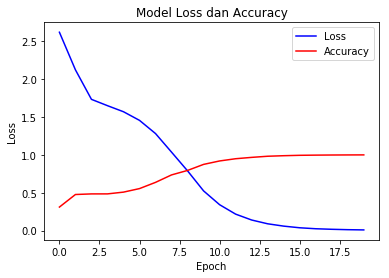

In [37]:
import matplotlib.pyplot as plt
print(history.history['loss'])
print(history.history['acc'])
    
# Plot training & validation loss values
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['acc'], 'r')
plt.title('Model Loss dan Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss','Accuracy'], loc='upper right')
plt.show()